#Homework 5: Lab (13 points)
##Name: Hannah Qu (hqu6), Smriti Srikanth (ssrikan2)

Please refer to the PDF description for homework 5 for a detailed description of the goals of this assignment.

You will hand in a PDF of this notebook. Please be sure to clearly answer each question listed at the end of the notebook.

##Setup the code.


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

##Load the Data

In [4]:
df = pd.read_csv("BPD_2012_2017.csv")
print(len(df))
# Drop missing values
df = df.dropna(subset=['Longitude', 'Latitude'])
# Show first 3 rows
df.head(3)

276529


,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1


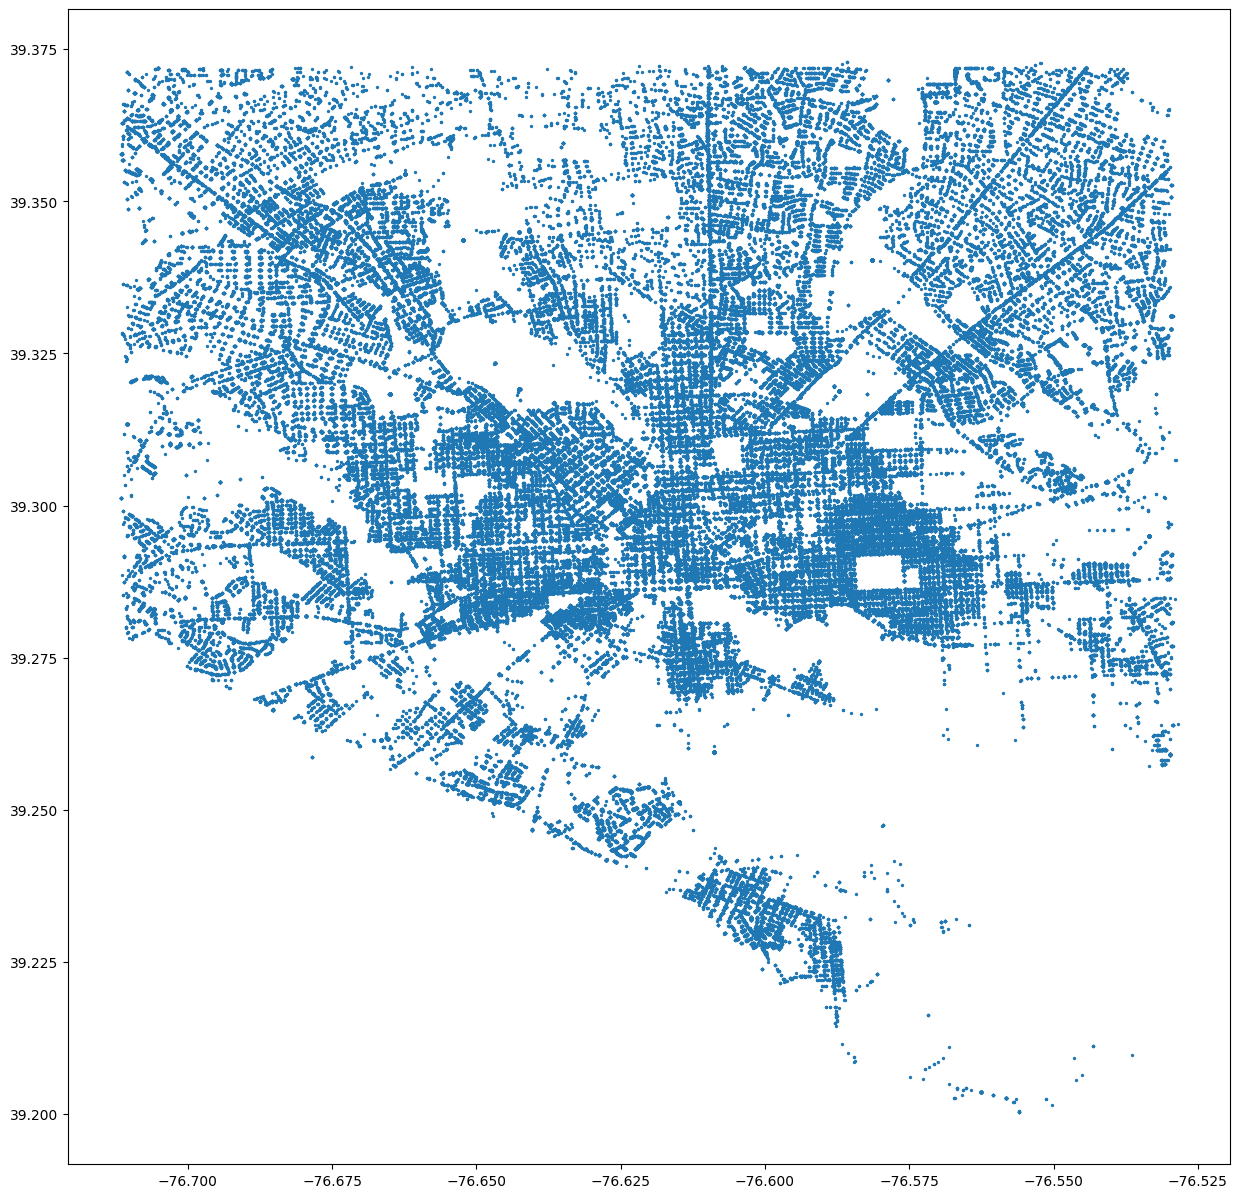

In [5]:
X = df[['Longitude', 'Latitude']].to_numpy()
# We don't need a test set for this task, so we use the whole dataset as the training set
plt.figure(figsize=(15,15))
plt.scatter(X[:,0], X[:,1], 2)

##Define the K-Means Model (TODO)

In [6]:
class Kmeans:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    def pairwise_distance(self, X, C):
        # Calculate the pairwise Euclidean distance between two numpy arrays X and C
        # X: N x D, i.e. N points in X
        # C: K x D, i.e. K points in C
        # return: N x K
        dists = np.empty([X.shape[0], C.shape[0]])
        for i in range(X.shape[0]):
            for k in range(C.shape[0]):
                dists[i][k] = np.linalg.norm(X[i]-C[k]) 
        return dists
    
    def fit(self, X_train, max_iter=100):
        n_samples = X_train.shape[0]
        
        #########################Step 1##########################
        # 1.1 Assign a random point as the prototype for each cluster
        prot = np.random.rand(self.n_clusters, X_train.shape[1])
        
        # 1.2 Calculate the distance between samples and initial prototypes
        # You may use the self.pairwise_distance function
        d = pairwise_distance(X_train, prot)
        # 1.3 Assign points to clusters
        centroids = np.zeros(n_samples, self.n_clusters)
        for i in range(n_samples):
            index = np.where(d[i] == np.min(d[i]))
            centroids[i][index] = 1
        
        # Start iterative training
        for n_iter in range(max_iter):
            ######################Step 2#########################
            # Update the prototypes
            for i in range(self.n_clusters):
                sum_num = np.zeros(1, X_train.shape[1])
                sum_den = 0
                for j in range(n_samples):
                    if r[j][i] == 1:
                        sum_num = np.add(sum_num, X_train[j])
                        sum_den += 1
                prot[i] = sum_num/sum_den
                    
                
            ######################Step 3#########################
            # 3.1 Calculate the updated distance between samples and prototypes
            # You may use the self.pairwise_distance function
            d = pairwise_distance(X_train, prot)
            # 3.2 Assign points to clusters
            r_prev = centroids
            for i in range(n_samples):
                index = np.where(d[i] == np.min(d[i]))
                centroids[i][index] = 1
        
            ######################Step 4#########################
            # Calculate the inertia
            inertia = 0
            for i in range(n_samples):
                inertia += np.min(d[i])
            if (n_iter+1) % 10 == 0:
                print("#Iteration: ", n_iter, "; inertia: {:.2f}".format(inertia))
                             
            ######################Step 5#########################
            # Check convergence: whether new cluster assignments are the same as previous cluster assignments
            if r_prev == centroids:
                print("Converged at iteration {0} with inertia {1:.2f}!".format(str(n_iter), inertia))
                break
            
        return inertia

    def predict(self, X):
        # Predict the cluster assignments for examples
        # return: an numpy array with the length of X.shape[0]
        cluster_ids = np.zeros(X.shape[0])
        
        return cluster_ids

SyntaxError: invalid syntax (383610085.py, line 37)

##Find the Elbow

In [ ]:
def plot_tune_n_clusters(X_train, max_clusters, max_iter=40):
    inertias = []
    for k in range(max_clusters):
        kmeans = Kmeans(k+1)
        print()
        print("#Cluster: ", (k+1))
        inertias.append(kmeans.fit(X_train, max_iter))
    plt.plot(np.arange(max_clusters) + 1, inertias)
    plt.show()
    return inertias

Q1. (11 points) Show the plot of inertia with number of clusters from 1 to 15. Report which number of clusters is at the elbow.

Please train your K-Means models on a subset of X (X_small) for this question, otherwise it takes too long to finish training. In practice, you may use the whole dataset to select n_cluster, if the computational resources allow.

In [ ]:
X_small = X[np.random.choice(X.shape[0], size=int(X.shape[0]*0.1), replace=False),:]  # Do not change this line of code, you should train kmeans on X_small for this question.
#TODO
#You might use the plot_tune_n_clusters function

##Visualization


In [ ]:
def plot_clusters(kmeans, X_train, cluster_ids):
    plt.figure(figsize=(15,15))
    for i in range(np.max(cluster_ids)+1):
        plt.scatter(X_train[cluster_ids == i, 0] , X_train[cluster_ids == i, 1] , s=2, label = i)
        plt.scatter(kmeans.centroids[i,0], kmeans.centroids[i, 1], label=i, s=500, marker="*")
    plt.show()

Q2. (2 points) Train your model with the selected number of clusters in Q1 and  plot the cluster assignments using the *plot_clusters* function.

Train on the whole dataset for this question.

In [ ]:
#TODO
#You might use the plot_cluster function